# Análisis Exploratorio para el Fashion MNIST

Este notebook sirve de repositorio central para el trabajo colaborativo del equipo de desarrollo del modelo de vision artificial para clasificación automática de prendas y complementos.

## Configuración Inicial

Importación de librerias y comprobaciones iniciales aqui:

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Carga y Pre-Procesado de las Imagenes

Aqui procederemos a la carga de las imagenes de entrenamiento y validación, asi como a su análisis y pre-procesado previo a la implementación del modelo. Vamos a comenzar cargando las imagenes y explorando su dimensionalidad:

In [6]:
# Load fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore data
print(train_images.shape)
print(train_labels)
print(test_images.shape)


(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


Los valores de intensidad de cada pixel en estas imagenes se almacenan en un byte, por tanto sus valores toman el intervalo de valores [0, 255]. Para trabajar con redes neuronales, es mas conveniente normalizar estos valores para que se encuentren en el rango entre [0.0, 1.0].

Mostramos las primeras 25 imagenes:


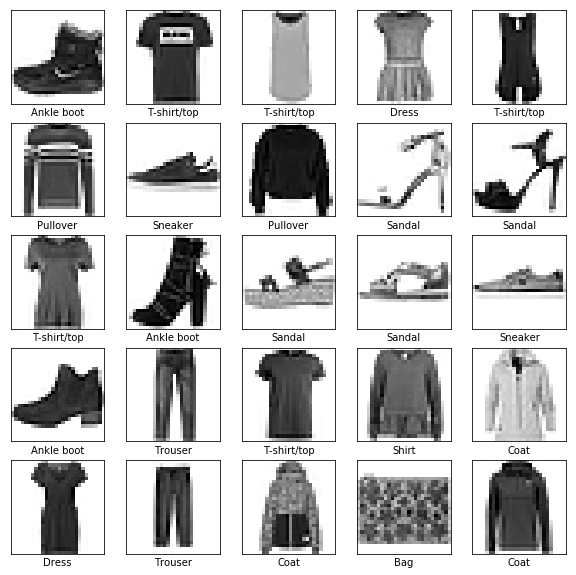

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print('Mostramos las primeras 25 imagenes:')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Creación del Modelo

Camos a implementar el modelo como un perceptron multicapa (MLP) muy sencillo: 

* Capa de Entrada, como un vector de 28x28 nodos
* Capa intermedia como una capa densa (completamente conectada) de 128 valores, con activación *ReLu*.
* Capa *softmax* final con 10 nodos, correspondientes a cada una de las categorias de clasificación.

La implementación la vamos a hacer con Keras sobre TensorFlow:

In [8]:
# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Ahora vamos a compilar y entrenar el modelo. Vamos a usar un optimizador *Adam* y definiremos como función de pérdida *Categorical CrossEntropy*, entrendando para maximizar la precisión del modelo:

In [9]:
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.4961 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.3758 - acc: 0.86473s - loss: 0.3803 - - ETA: 4s - loss: 0.3783 - a - ETA: 4s - loss: 0.3761 
Epoch 3/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.3387 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.3124 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.2942 - acc: 0.8932


## Evaluación del Modelo

En esta sección vamos a evaluar el funcionamiento del modelo usando la métrica de **Accuracy**:


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 111us/step
Test accuracy: 0.8672


## Predicciones de Ejemplo

Vamos a hacer una serie de predicciones y ver como se comporta el modelo:

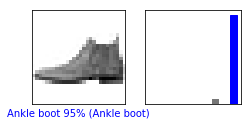

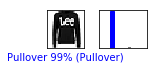

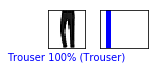

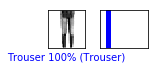

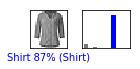

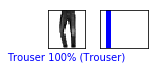

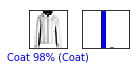

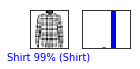

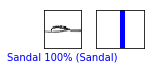

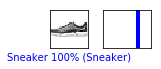

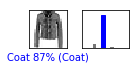

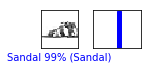

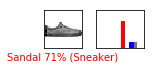

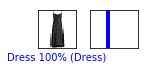

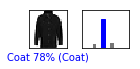

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def display_images(train_images, train_labels, class_names, num_images=25):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()